In [2]:

import matplotlib.pyplot as plt
from sklearn.datasets import load_digits


digits = load_digits()
digits


{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [7]:
# data details
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [60]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [25]:
# printing out the first data element
# using data prints out the data properties of the given element or number
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

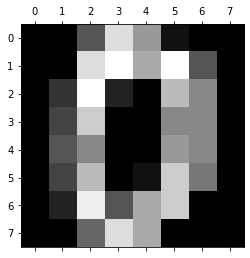

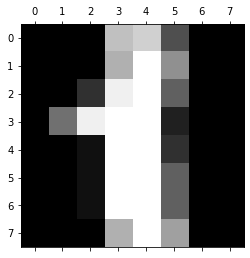

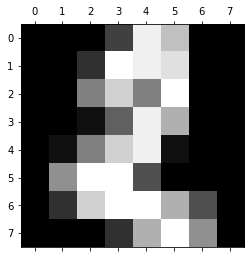

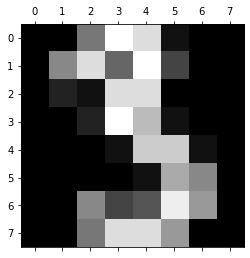

In [27]:
# using images prints out the image of the given element or number
plt.gray()
for i in range(4):
    plt.matshow(digits.images[i])

In [28]:
# using targets indicates the position of each image or data of an element or given number 
digits.target[0:4]

array([0, 1, 2, 3])

In [35]:
# now we can use data and target to train our model
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(digits.data,digits.target,test_size=0.2)
len(x_test)

360

In [36]:
len(x_train)

1437

In [48]:
# now we can import logistic regression and then create a model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
model.score(x_train, y_train)

1.0

In [50]:
model.score(x_test, y_test)

0.9777777777777777

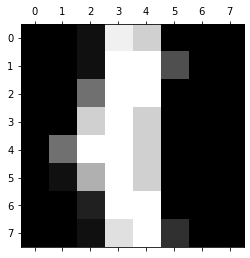

In [51]:
plt.matshow(digits.images[99])

In [53]:
digits.target[99]

1

In [54]:
# lets make a prediction of 99 from our model
model.predict(digits.data[[99]])

array([1])

In [55]:
# lets predict from 0 to 5
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

# Since the accuracy score for the x and y train is 0.97 which means it is 97% accurate, let us check where it is not accurate or where it didn't do well or where it fails and one of the ways of doing that is confusion matrix, and it will be shown what really it is



In [56]:
y_predicted = model.predict(x_test)
from sklearn.metrics import confusion_matrix 
cn = confusion_matrix(y_test, y_predicted)
cn

array([[35,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 26,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 41,  0,  0,  1,  0,  1],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 40,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 37,  0,  0],
       [ 0,  0,  1,  0,  1,  1,  0,  0, 32,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 29]], dtype=int64)

# It is better visualized in matplotlib or seaborn which is illustrated below

Text(69.0, 0.5, 'Truth')

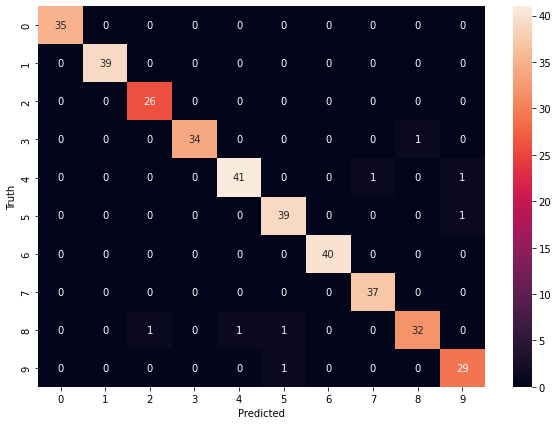

In [59]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cn, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')